In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
from matplotlib.colors import LogNorm
plt.rcParams['image.cmap'] = 'viridis'

from ugali.analysis import kernel
from ugali.utils.projector import angsep

# Creating Kernels

The `kernel` module provides an API to create spatial kernels and calculate various characteristics of dwarf galaxies. The easiest way to create a kernel is through the general factory interface shown below.

In [3]:
def draw_kernel(k,**kwargs):
    lon = k.lon+np.linspace(-0.4,0.4,100)
    lat = k.lat+np.linspace(-0.4,0.4,100)
    xx,yy = np.meshgrid(lon,lat)
    val = k(xx.flat,yy.flat).reshape(xx.shape)
    plt.pcolormesh(lon,lat,val,**kwargs)
    # Note that it's important to set the aspect when drawing ellipses
    plt.gca().set_aspect('equal')
    plt.xlim(lon.min(),lon.max()); plt.ylim(lat.min(),lat.max())
    plt.xlabel("Longitude (deg)"); plt.ylabel("Latitude (deg)")

In [4]:
plummer = kernel.factory(name='EllipticalPlummer',lon=0,lat=0,r_h=0.1,ellipticity=0.5, position_angle=45)
print plummer

EllipticalPlummer
  Parameters:
    lon            : Parameter(0, [0.0, 360.0], False)
    lat            : Parameter(0, [-90.0, 90.0], False)
    extension      : Parameter(0.1, [0.0001, 0.5], False)
    ellipticity    : Parameter(0.5, [0.0, 0.99], False)
    position_angle : Parameter(45, [0.0, 180.0], False)
    truncate       : Parameter(3.0, [0.0, inf], False)


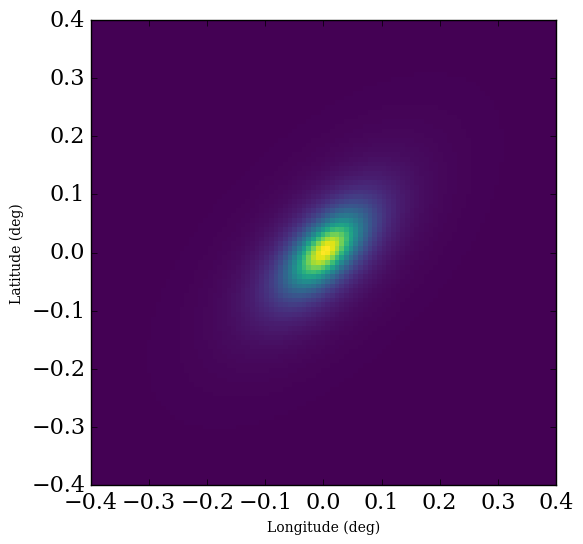

In [5]:
plt.figure(figsize=(6,6)); draw_kernel(plummer)

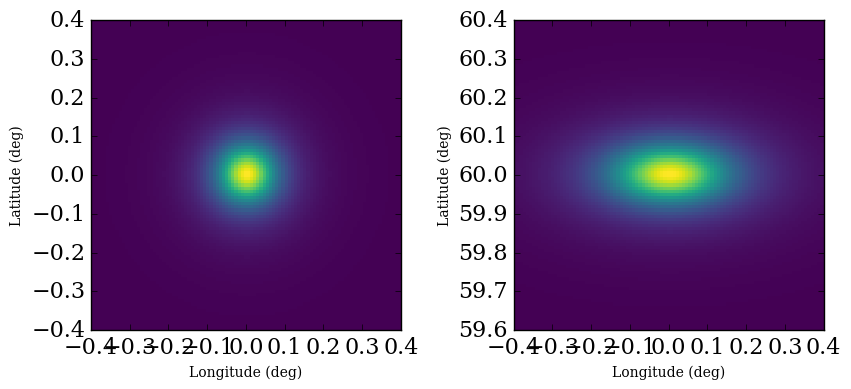

In [6]:
# Note that the kernel is calculated from the angular separation on the sky'
# Thus plotting on cartesian coordinates is not accurate

plummer0 = kernel.factory(name='Plummer',lon=0,lat=0,r_h=0.1,ellipticity=0.0)
plummer60 = kernel.factory(name='Plummer',lon=0,lat=60,r_h=0.1,ellipticity=0.0)
fig,ax = plt.subplots(1,2,figsize=(10,4))
plt.sca(ax[0]); draw_kernel(plummer0); 
plt.sca(ax[1]); draw_kernel(plummer60);

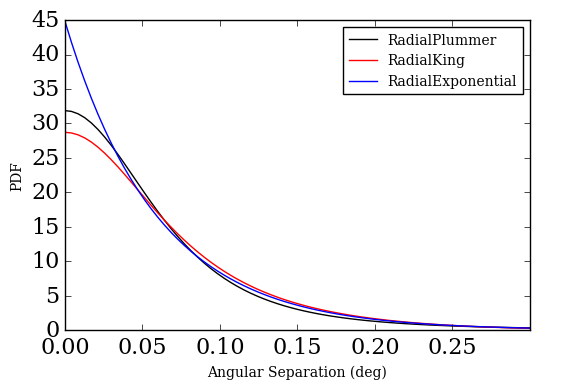

In [7]:
# The radial profile of various profiles can also be plotted
lon = np.linspace(0,0.3,100)
lat = np.linspace(0,0.3,100)

plummer = kernel.factory(name='Plummer',lon=0,lat=0,r_h=0.1)
king = kernel.factory(name='King',lon=0,lat=0,r_c=0.1/1.185,r_t=0.423)
exponential = kernel.factory(name='Exponential',lon=0,lat=0,r_h=0.1)

plt.figure()
for k in [plummer, king, exponential]:
    r = angsep(k.lon,k.lat,lon,lat)
    plt.plot(r,k(lon,lat),label=k.__class__.__name__)

plt.legend()
plt.xlim(0,0.3)
plt.xlabel("Angular Separation (deg)")
plt.ylabel("PDF")

In [8]:
# Note that each kernel has it's own set of scale parameters. 
# The sizes of all kernels can be accessed through the 
# `extension` member, though the meaning of `extension` is 
# different for each kernel type

print plummer
print king
print exponential

RadialPlummer
  Parameters:
    lon            : Parameter(0, [0.0, 360.0], False)
    lat            : Parameter(0, [-90.0, 90.0], False)
    extension      : Parameter(0.1, [0.0001, 0.5], False)
    ellipticity    : Parameter(0, [0, 0], False)
    position_angle : Parameter(0, [0, 0], False)
    truncate       : Parameter(3.0, [0.0, inf], False)
RadialKing
  Parameters:
    lon            : Parameter(0, [0.0, 360.0], False)
    lat            : Parameter(0, [-90.0, 90.0], False)
    extension      : Parameter(0.084388185654, [0.0001, 0.5], False)
    ellipticity    : Parameter(0, [0, 0], False)
    position_angle : Parameter(0, [0, 0], False)
    truncate       : Parameter(0.423, [0.0, inf], False)
RadialExponential
  Parameters:
    lon            : Parameter(0, [0.0, 360.0], False)
    lat            : Parameter(0, [-90.0, 90.0], False)
    extension      : Parameter(0.1, [0.0001, 0.5], False)
    ellipticity    : Parameter(0, [0, 0], False)
    position_angle : Parameter(0, [0, 0]

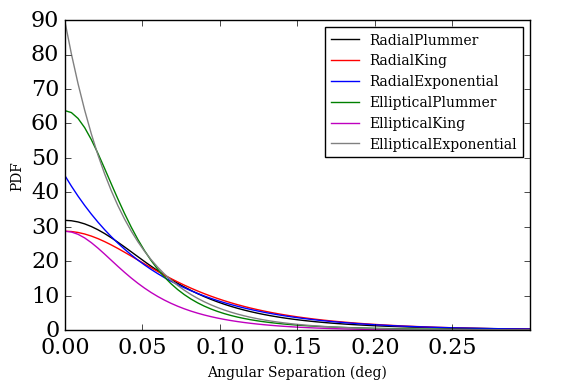

In [9]:
# You can also make a similar plot for elliptical kernels (in this case the radius is the elliptical radius)
ell_plummer = kernel.factory(name='EllipticalPlummer',lon=0,lat=0,r_h=0.1,ellipticity=0.5)
ell_king = kernel.factory(name='EllipticalKing',lon=0,lat=0,r_c=0.1/1.185,r_t=0.423,ellipticity=0.5)
ell_exponential = kernel.factory(name='EllipticalExponential',lon=0,lat=0,r_h=0.1,ellipticity=0.5)

plt.figure()
for k in [plummer, king, exponential,ell_plummer,ell_king,ell_exponential]:
    r = angsep(k.lon,k.lat,lon,lat)
    plt.plot(r,k(lon,lat),label=k.__class__.__name__)

plt.legend()
plt.xlim(0,0.3)
plt.xlabel("Angular Separation (deg)")
plt.ylabel("PDF")

# Modifying Kernels

Kernels are derived from the same underlying `model` class as isochrones. Similarly to isochrones, after you create a kernel you can modify it's parameters on the fly.

In [10]:
ker = kernel.factory(name='EllipticalPlummer',lon=0,lat=0,r_h=0.1,ellipticity=0.5)

# You can set the age, metallicity, and distance modulus
ker.ellipticity = 0.1
# These are the same thing
ker.extension = 0.2
ker.r_h = 0.2 

print ker

EllipticalPlummer
  Parameters:
    lon            : Parameter(0, [0.0, 360.0], False)
    lat            : Parameter(0, [-90.0, 90.0], False)
    extension      : Parameter(0.2, [0.0001, 0.5], False)
    ellipticity    : Parameter(0.1, [0.0, 0.99], False)
    position_angle : Parameter(0.0, [0.0, 180.0], False)
    truncate       : Parameter(3.0, [0.0, inf], False)


In [11]:
# Each parameter has bounds and will throw an error if you are outside the range (useful for fitting)
try:
    ker.r_h = 40
except ValueError as e:
    print "Error:",e


Error: Value outside bounds: 40 [0.0001,0.5]


# Advanced Methods

The `Kernel` class has a few other nice methods.

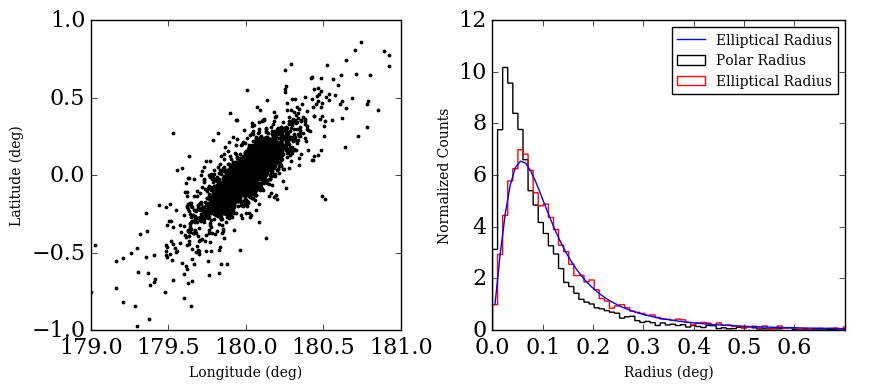

In [12]:
# Drawing a random set of points from a kernel
ker = kernel.factory(name='EllipticalPlummer',lon=180,lat=0,r_h=0.1,ellipticity=0.7,position_angle=45)
lon,lat = ker.sample(n=int(1e4))

fig,ax = plt.subplots(1,2,figsize=(10,4))
plt.sca(ax[0])
plt.scatter(lon,lat,c='k',s=3)
plt.gca().set_aspect('equal')
plt.ylim(-1,1); plt.xlim(179,181)
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")

plt.sca(ax[1])
bins = np.linspace(0,1,100)
centers = (bins[:-1]+bins[1:])/2.
plt.hist(angsep(ker.lon,ker.lat,lon,lat),bins=bins,histtype='step',normed=True,label='Polar Radius')
plt.hist(ker.radius(lon,lat),bins=bins,histtype='step',normed=True,label='Elliptical Radius')
plt.plot(centers,[len(bins)*ker.integrate(b1,b2) for b1,b2 in zip(bins[:-1],bins[1:])],label='Elliptical Radius')
plt.xlim(0,0.7)
plt.xlabel('Radius (deg)')
plt.ylabel('Normalized Counts')
plt.legend()